In [1]:
import pandas as pd
import numpy  as np
import random
import matplotlib.pyplot as plt
import os 
os.chdir('D:\Edureka DataSets')
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Here we can see that high majority value is '0' and less no of '1' that mean to  say it is imbalanced dataset.so now we will use imbalanced tecniques.
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()
column = df.columns.tolist()
column = [i for i in df.columns if i not in ['Class']]

In [4]:

target = 'Class'

In [5]:
state = np.random.RandomState(42)
X = df[column]
Y = df[target]
X.shape , Y.shape

((284807, 30), (284807,))

In [6]:
df.isnull().values.any()
label = ['Normal','Fraud']

In [7]:
count_class = pd.value_counts(df['Class'],sort = True)

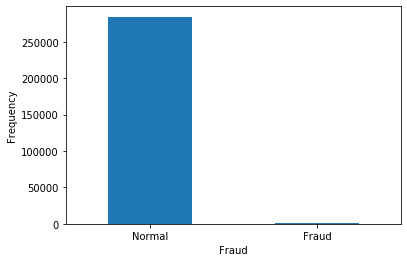

In [8]:
count_class.plot(kind = 'bar',rot = 0)
plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.xticks(range(2),label)
plt.show()

In [9]:
Fraud = df[df.Class == 1]

In [10]:
Normal = df[df.Class == 0]

In [11]:
Fraud.shape , Normal.shape

((492, 31), (284315, 31))

In [12]:
# Implement OverSampling tecnique for handle imbalance dataset.
# SMOTETomek is the  combination of  under_sampling and Over_sampling(over_sampling is more efficient other than under sampling because in under sampling we can lose some data but over_sampling we cannot we most of the time we prefer to use over_sampling.)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state = 42)
X_smk , Y_smk = smk.fit_sample(X,Y)
X_smk.shape , Y_smk.shape

Using TensorFlow backend.


((567562, 30), (567562,))

In [16]:
from collections import Counter
print('Original DataSet {}'.format(Counter(Y)))
print('Resampled Dataset {}'.format(Counter(Y_smk)))

Original DataSet Counter({0: 284315, 1: 492})
Resampled Dataset Counter({0: 283781, 1: 283781})


In [19]:
# Apply RandomOverSampling to handle imbalanced datset
from imblearn.over_sampling import RandomOverSampler
RS = RandomOverSampler()
X_rs , Y_rs = RS.fit_sample(X, Y)
X_rs.shape , Y_rs.shape

((568630, 30), (568630,))

In [20]:
# Apply Under-Sampling 
from imblearn.under_sampling import NearMiss
NM = NearMiss()
X_NM , Y_NM = NM.fit_sample(X, Y)
X_NM.shape , Y_NM.shape

((984, 30), (984,))

In [21]:
# Over- Sampling
OS = SMOTETomek()
X_os , Y_os = OS.fit_sample(X,Y)
X_os.shape , Y_os.shape


((567574, 30), (567574,))

# Apply Feature Engineering


In [225]:
# Checking how what Percentage of missing value dataset have.
def val(column , data):
    v1 = data[column].value_counts()[0]/len(data)
    v2 = data[column].value_counts()[1]/len(data)
    return print('Normal {}% , Fraud {}%'.format(v1 , v2))
val('Class',df)

Normal 0.9982725143693799% , Fraud 0.001727485630620034%


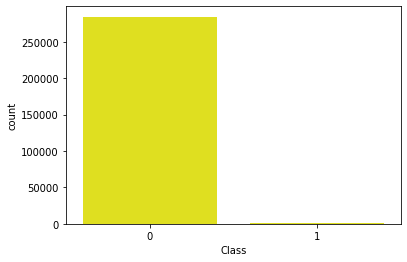

In [226]:
import seaborn as sns
colors = ['yellow']
sns.countplot('Class',data = df , palette = colors)

In [25]:
# To make a balance of fraud and non fraud we apply this thing.
df = df.sample(frac = 1)
fraud = df.loc[df['Class']==1]
non_fraud = df.loc[df['Class']==0][:492]
normal_distributed = pd.concat([fraud , non_fraud])
new_df = normal_distributed.sample(frac = 1, random_state = 42)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180226,124436.0,-0.066144,0.022630,0.573349,-1.803766,0.047718,-1.947762,1.099290,-0.636443,-0.903976,0.033664,-0.446594,0.000434,0.121321,-0.007651,-0.695603,-1.606521,-0.649771,1.032225,-2.733577,-0.631506,0.098103,0.906768,0.064897,0.910962,-0.880030,-0.580757,0.069084,0.041817,30.34,0
88258,62059.0,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,-4.153692,1.398185,-5.653270,-1.233694,-6.332513,0.458715,-1.983610,-4.929162,-1.038482,-0.133819,0.290187,0.417762,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,6.62,1
196138,131371.0,-0.947727,0.950871,2.522404,3.160540,1.333342,1.436688,0.501537,-0.167487,-1.138064,1.344973,-1.572457,-0.686062,0.922541,-0.996872,-0.042470,0.617926,-0.933038,0.344287,-0.453496,0.173241,0.120144,0.696560,-0.590870,0.207156,0.495250,0.311736,-0.518486,-0.288531,16.95,0
151462,95559.0,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,5.573625,-13.635216,-0.483236,-7.352792,-2.392684,-8.728142,-17.598854,-7.455956,0.169741,2.106034,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1
150654,93834.0,-3.765680,5.890735,-10.202268,10.259036,-5.611448,-3.235376,-10.632683,3.272716,-5.268905,-11.182125,8.879476,-18.431131,-0.232822,-15.021657,0.141186,-12.186362,-20.165567,-7.051651,2.500827,1.194137,2.245606,0.546321,0.381853,0.382025,-0.821036,0.394355,1.412961,0.782407,0.01,1


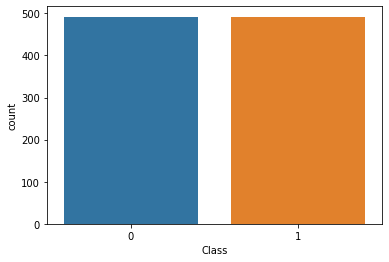

In [27]:
# After this we can applying our preprocessing part.
import seaborn as sns
sns.countplot('Class',data = new_df)
plt.show()

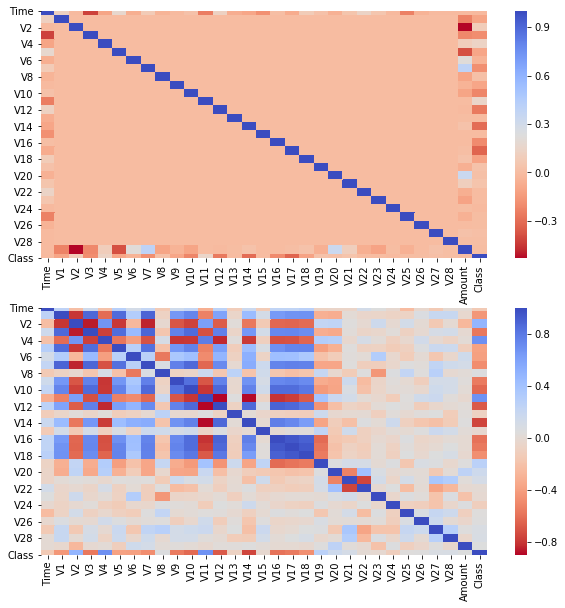

In [40]:
# In this  heatmap we can see the correlation before the handle imbalanced data and after handle the data
f,(ax1 , ax2 ) = plt.subplots(2,1,figsize =(10,10))
corr = df.corr()
sns.heatmap(corr , ax = ax1 , cmap = 'coolwarm_r')
new_corr = new_df.corr()
sns.heatmap(new_corr , ax = ax2 ,cmap = 'coolwarm_r')

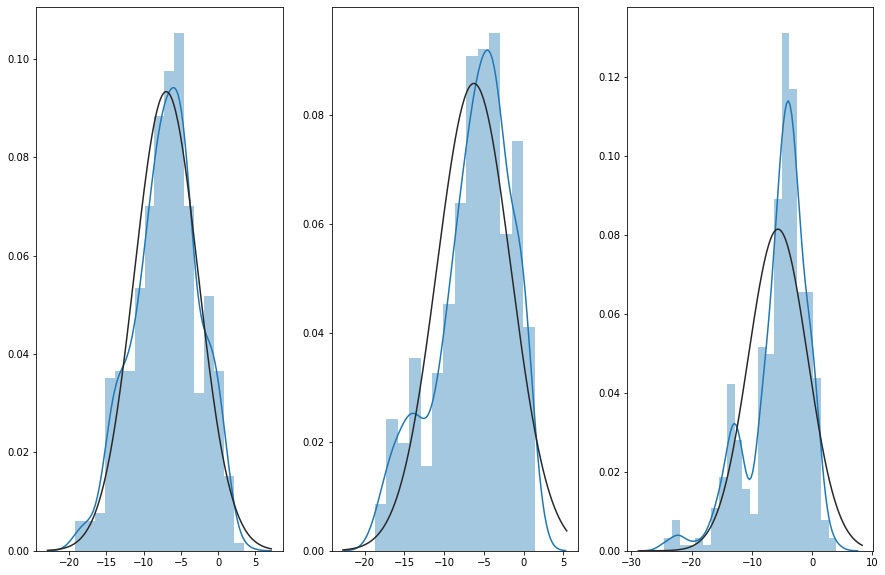

In [47]:
# In this we are norm our data.
from scipy.stats import norm
f , (ax1 , ax2 , ax3) = plt.subplots(1,3 ,figsize = (15,10))
v14_dist = new_df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_dist , ax = ax1,fit = norm)
v12_dist =  new_df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_dist , ax = ax2,fit = norm)
v10_dist =  new_df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_dist , ax = ax3,fit = norm)

In [80]:
X = new_df.drop('Class',axis = 1)
y = new_df['Class']
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 42)

In [81]:
X_train = X_train.values


In [82]:
X_test = X_test.values


In [83]:
Y_train = Y_train.values


In [84]:
Y_test = Y_test.values


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble  import RandomForestClassifier

In [101]:
# Model selection.
models= []
models.append(('lr',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('SVM',SVC(gamma = 'auto')))
for name , model in models:
    cross_val = cross_val_score(model ,X_train , Y_train , cv = 5)
    print('Name {} , Model: {}'.format(name , cross_val.mean()))
    

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Name lr , Model: 0.9415060872369588
Name DT , Model: 0.9148189954043378
Name RF , Model: 0.9351447230508748
Name SVM , Model: 0.5425703458840603


# If we have a imbalanced dataset then it causes overfitting Problem and unable to see the correlation between the classes 